<a href="https://colab.research.google.com/github/Akataruka/MNIST_dataset_prediction/blob/main/MNIST_dataset_task_IIITH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the dependency modules
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#get the shapes of the different train and test samples
print("train images shape: ",train_images.shape)
print("train labels shape: ",test_images.shape)
print("test images shape: ", train_labels.shape)
print("test labels shape: ",test_labels.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (10000, 28, 28)
test images shape:  (60000,)
test labels shape:  (10000,)


So we have 60000 training sampels
and we have 10000 testing samples

In [4]:
# Normalize the data

#Reshape the data to be able effectively distinguish a single image (28*28*1)
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

#The values of BW image is from (0-255) we normalise the value sin teh range (0-1)
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255


train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation split of 10% training data

In [5]:
val_images = train_images[-6000:]
val_labels = train_labels[-6000:]

train_images = train_images[:-6000]
train_labels = train_labels[:-6000]

In [6]:
#get the shapes of the different train and test samples
print("train images shape: ",train_images.shape)
print("train labels shape: ", train_labels.shape)
print("test images shape: ",test_images.shape)
print("test labels shape: ",test_labels.shape)
print("val images shape: ",val_images.shape)
print("val lables shape: ",val_labels.shape)

train images shape:  (54000, 28, 28, 1)
train labels shape:  (54000, 10)
test images shape:  (10000, 28, 28, 1)
test labels shape:  (10000, 10)
val images shape:  (6000, 28, 28, 1)
val lables shape:  (6000, 10)


#Creating an overfitting model
Main points to be kept in mind are
- Overfitting model is a model that performs good in train dataset but gives poor results  test dataset as the model get overfitted to the train data values
- we can get the model to over fit the dataset by training it exclusively on train dataset that is training it with too many parameters
- using too many epochs to train the model and using small batches if the dataset to train the model can cause overfitting of teh model to the train dataset



In [7]:
# Define the overfitting CNN model
overfit_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
overfit_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the overfitting model
overfit_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [9]:
# history = model.fit(train_images, train_labels, validation_split=0.1, epochs=50, batch_size = 32)
# Fit the overfitting model (without regularization)
# train_images, train_labels,validation_data=(val_images, val_labels), epochs=30, batch_size = 32
overfit_history = overfit_model.fit(train_images, train_labels, epochs=20,validation_data=(val_images, val_labels))

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8838 - loss: 0.3684 - val_accuracy: 0.9840 - val_loss: 0.0641
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9846 - loss: 0.0498 - val_accuracy: 0.9867 - val_loss: 0.0475
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0343 - val_accuracy: 0.9903 - val_loss: 0.0346
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9917 - val_loss: 0.0331
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9893 - val_loss: 0.0436
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9915 - val_loss: 0.0310
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9968 - loss: 0.0096

In [10]:
overfit_model.evaluate(test_images, test_labels)[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0436


0.9922999739646912

#Regularized Model
- we can overcome the overfitting issue in models with too many parameters by addign dropout effect to the layers (dropout method uses only some percentage of neurons at a particulat instance to trian the model)
-we can use l1 and l2 regularisation methods to avoid overfitting issue
- we can also use weight decay method to supress the change due to the error backpropagation to the far away layers
- we can use smaller batches of dataset at a time to train the model to regularsise the model

In [11]:
# Define the model with L2 regularization and dropout layers
regularized_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the regularized model
regularized_model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

In [13]:
# Fit the regularized model
regularized_history = regularized_model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.8375 - loss: 0.6478 - val_accuracy: 0.9837 - val_loss: 0.1850
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9687 - loss: 0.2170 - val_accuracy: 0.9867 - val_loss: 0.1475
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9738 - loss: 0.1827 - val_accuracy: 0.9863 - val_loss: 0.1428
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.1728 - val_accuracy: 0.9873 - val_loss: 0.1305
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9776 - loss: 0.1611 - val_accuracy: 0.9893 - val_loss: 0.1221
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9776 - loss: 0.1554 - val_accuracy: 0.9847 - val_loss: 0.1314
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9784 - loss: 0.1524 - val_accuracy: 0.9875 - val_loss: 0.1243
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9787 - loss: 0.1471 

In [14]:
# Evaluate the overfitting model
overfit_loss, overfit_accuracy = overfit_model.evaluate(test_images, test_labels)
print("Overfitting model - Loss: {:.4f}, Accuracy: {:.4f}".format(overfit_loss, overfit_accuracy))

# Evaluate the regularized model
regularized_loss, regularized_accuracy = regularized_model.evaluate(test_images, test_labels)
print("Regularized model - Loss: {:.4f}, Accuracy: {:.4f}".format(regularized_loss, regularized_accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0436
Overfitting model - Loss: 0.0378, Accuracy: 0.9923
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.1117
Regularized model - Loss: 0.1041, Accuracy: 0.9876


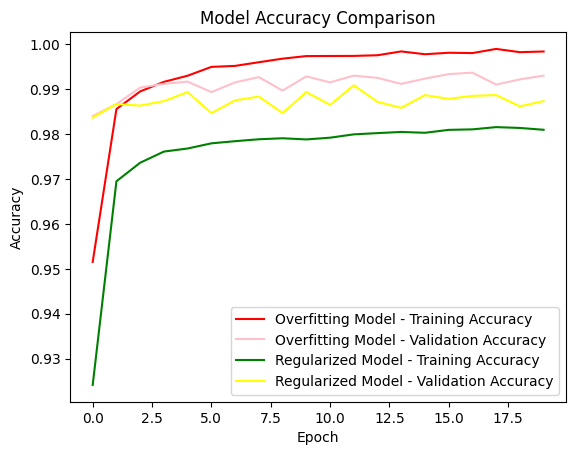

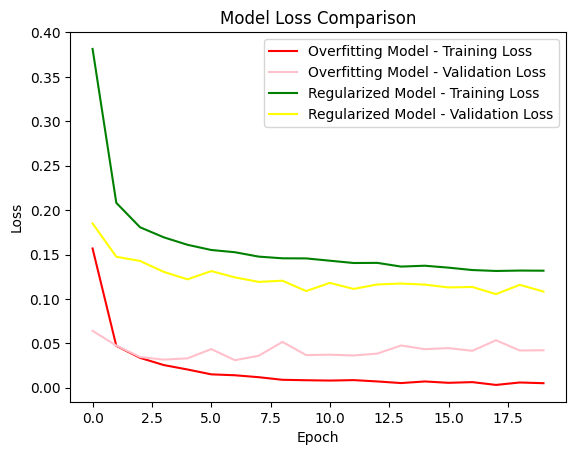

In [16]:
#  Plot training history
plt.plot(overfit_history.history['accuracy'], label='Overfitting Model - Training Accuracy', color='red')
plt.plot(overfit_history.history['val_accuracy'], label='Overfitting Model - Validation Accuracy', color='pink')
plt.plot(regularized_history.history['accuracy'], label='Regularized Model - Training Accuracy', color='green')
plt.plot(regularized_history.history['val_accuracy'], label='Regularized Model - Validation Accuracy', color='yellow')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(overfit_history.history['loss'], label='Overfitting Model - Training Loss', color='red')
plt.plot(overfit_history.history['val_loss'], label='Overfitting Model - Validation Loss', color='pink')
plt.plot(regularized_history.history['loss'], label='Regularized Model - Training Loss', color='green')
plt.plot(regularized_history.history['val_loss'], label='Regularized Model - Validation Loss', color='yellow')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Conclusion
- In this CNN network training on MNIST dataset we first developed a model that was overfit to the training dataset as the train loss was nearly equal to 0
- Then we applied L2 regularisation and dropout layer to reduce the overfitiing issue
- As a result we can see that the train loss is high in regularized model but the accuracy is nearly eual to the overfitting model so the regularized model is more likely to give a correct prediction as it is not overfitted to the train dataset